
## Hierarchical clustering of the grain data

```
Exercise ID 63541
```

###  Assignment 

In the video, you learned that the SciPy `linkage()` function performs hierarchical clustering on an array of samples.  Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.  A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.

In [1]:
import pandas as pd

df = pd.read_csv('https://assets.datacamp.com/production/course_2234/datasets/seeds.csv', header=None)

sample_indices = [5 * i + 1 for i in range(42)]
df = df.iloc[sample_indices]
samples = df[list(range(7))].values
varieties = list(df[7].map({1: 'Kama wheat', 2: 'Rosa wheat', 3: 'Canadian wheat'}))

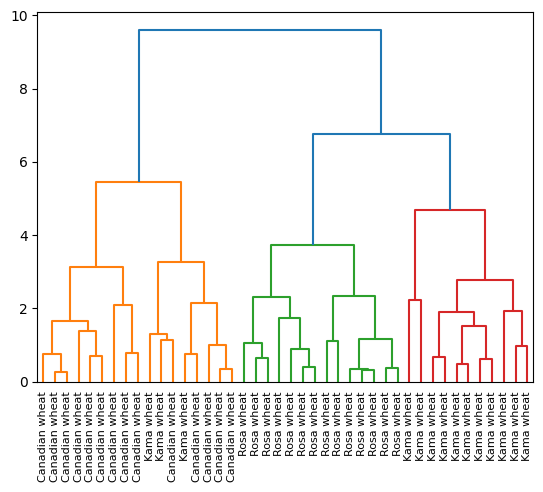

In [6]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

mergings  =linkage( samples , method ='complete')
dendrogram(mergings, 
           labels = varieties,
           leaf_font_size= 8, 
           leaf_rotation=90 )

plt.show()

##  Hierarchies of stocks

```
Exercise ID 63543
```

###  Assignment 

In chapter 1, you used k-means clustering to cluster companies according to their stock price movements. Now, you'll perform hierarchical clustering of the companies.  You are given a NumPy array of price movements `movements`, where the rows correspond to companies, and a list of the company names `companies`.  SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the `normalize()` function from `sklearn.preprocessing` instead of `Normalizer`.

`linkage` and `dendrogram` have already been imported from `scipy.cluster.hierarchy`, and PyPlot has been imported as `plt`.


In [1]:
import pandas as pd

df = pd.read_csv('https://assets.datacamp.com/production/course_2072/datasets/company-stock-movements-2010-2015-incl.csv', index_col=0)
companies = list(df.index)
movements = df.values

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans



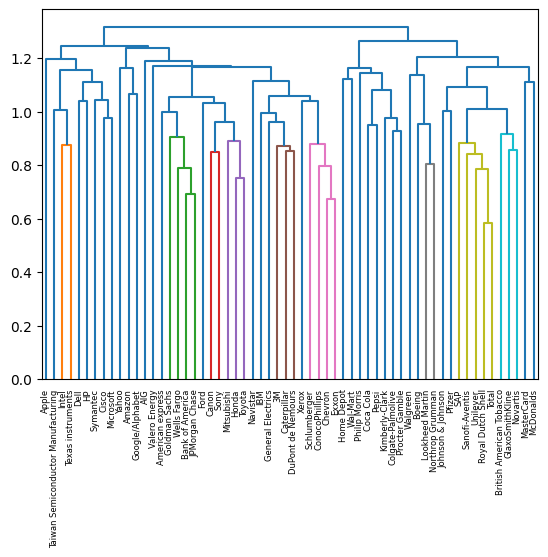

In [2]:
movements_norm = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(movements_norm, method='complete')

# Plot the dendrogram
dendrogram(
    mergings,
    labels=companies,
    leaf_rotation=90,
    leaf_font_size=6
)
plt.show()

##  Different linkage, different hierarchical clustering!

```
Exercise ID 63550
```

###  Assignment 

In the video, you saw a hierarchical clustering of the voting countries at the Eurovision song contest using `'complete'` linkage. Now, perform a hierarchical clustering of the voting countries with `'single'` linkage, and compare the resulting dendrogram with the one in the video.  Different linkage, different hierarchical clustering!

You are given an array `samples`. Each row corresponds to a voting country, and each column corresponds to a performance that was voted for. The list `country_names` gives the name of each voting country. This dataset was obtained from  [Eurovision](https://www.eurovision.tv/page/results).

In [3]:
##  Pre exercise code 

import pandas as pd
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage, dendrogram

df = pd.read_csv('https://assets.datacamp.com/production/course_2072/datasets/eurovision-2016.csv').fillna(0)

scores = pd.crosstab(index=df['From country'], columns=df['To country'], values=df['Televote Points'], aggfunc='first').fillna(12)
samples = scores.values
country_names = list(scores.index)

###  Instructions 

- Import `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
- Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='single'` keyword argument. Assign the result to `mergings`.
- Plot a dendrogram of the hierarchical clustering, using the list `country_names` as the `labels`. In addition, specify the `leaf_rotation=90`, and `leaf_font_size=6` keyword arguments as you have done earlier.


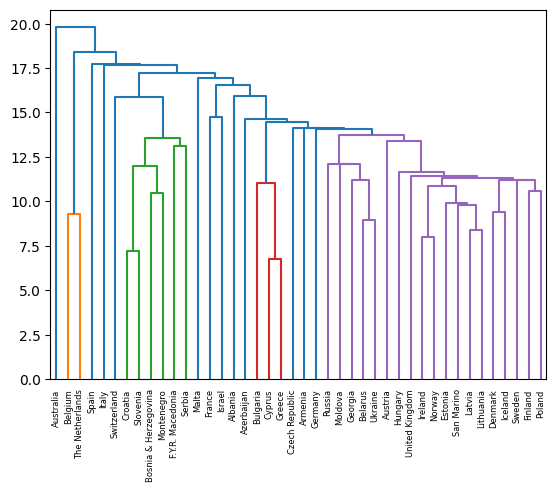

In [5]:

mergings = linkage(samples , method= 'single')
dendrogram(mergings ,
           labels = country_names,
           leaf_rotation = 90,
           leaf_font_size = 6)

plt.show()

##  Intermediate clusterings

```
Exercise ID 92999
```

###  Assignment 

Displayed on the right is the dendrogram for the hierarchical clustering of the grain samples that you computed earlier. If the hierarchical clustering were stopped at height 6 on the dendrogram, how many clusters would there be?


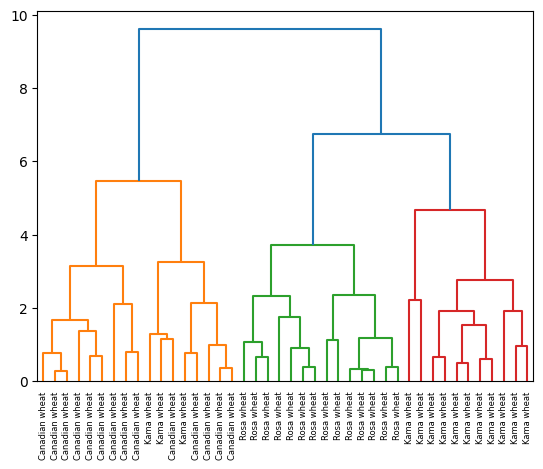

In [6]:
##  Pre exercise code 

# Note: this needs to correspond exactly to the solution of the HC of the grain samples exercise from earlier
import pandas as pd

df = pd.read_csv('https://assets.datacamp.com/production/course_2234/datasets/seeds.csv', header=None)

sample_indices = [5 * i + 1 for i in range(42)]
df = df.iloc[sample_indices]
samples = df[list(range(7))].values
varieties = list(df[7].map({1: 'Kama wheat', 2: 'Rosa wheat', 3: 'Canadian wheat'}))

# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
plt.clf()

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

##  Extracting the cluster labels

```
Exercise ID 63546
```

###  Assignment 

In the previous exercise, you saw that the intermediate clustering of the grain samples at height 6 has 3 clusters. Now, use the `fcluster()` function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

The hierarchical clustering has already been performed and `mergings` is the result of the `linkage()` function. The list `varieties` gives the variety of each grain sample.

In [10]:
###  Pre exercise code 

import pandas as pd

pd.set_option('display.max_columns', None)
df = pd.read_csv('https://assets.datacamp.com/production/course_2234/datasets/seeds.csv', header=None)
sample_indices = [5 * i + 1 for i in range(42)]
df = df.iloc[sample_indices]
samples = df[list(range(7))].values
varieties = list(df[7].map({1: 'Kama wheat', 2: 'Rosa wheat', 3: 'Canadian wheat'}))

from scipy.cluster.hierarchy import linkage, fcluster

mergings = linkage(samples, method='complete')

In [12]:
labels = fcluster(mergings , 6 , criterion = 'distance')

df = pd.DataFrame({'label' : labels , 'varieties' : varieties})

In [14]:
ct = pd.crosstab(df['label'], df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
label                                            
1                      14           3           0
2                       0           0          14
3                       0          11           0


##  t-SNE visualization of grain dataset

```
Exercise ID 78587
```

###  Assignment 

In the video, you saw t-SNE applied to the iris dataset. In this exercise, you'll apply t-SNE to the grain samples data and inspect the resulting t-SNE features using a scatter plot. You are given an array `samples` of grain samples and a list `variety_numbers` giving the variety number of each grain sample.


In [15]:
#  Pre exercise code 

import pandas as pd

df = pd.read_csv('https://assets.datacamp.com/production/course_2234/datasets/seeds.csv', header=None)

samples = df[list(range(7))].values
variety_numbers = list(df[7])

from matplotlib import pyplot as plt
import numpy as np

#np.random.seed(42)



###  Instructions 

- Import `TSNE` from `sklearn.manifold`.
- Create a TSNE instance called `model` with `learning_rate=200`.
- Apply the `.fit_transform()` method of `model` to `samples`. Assign the result to `tsne_features`.
- Select the column `0` of `tsne_features`. Assign the result to `xs`.
- Select the column `1` of `tsne_features`. Assign the result to `ys`.
- Make a scatter plot of the t-SNE features `xs` and `ys`. To color the points by the grain variety, specify the additional keyword argument `c=variety_numbers`.



In [16]:
from sklearn.manifold import TSNE

model = TSNE( learning_rate = 200)
transformed = model.fit_transform(samples)

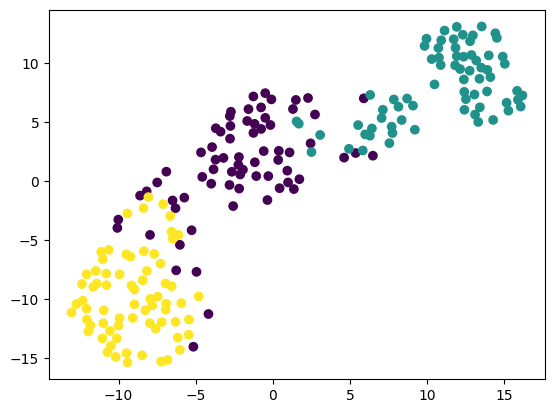

In [17]:
xs = transformed[:,0]
ys = transformed[:,1]

plt.scatter(xs , ys, c = variety_numbers)
plt.show()

##  A T-SNE map of the stock market

```
Exercise ID 78588
```

###  Assignment 

t-SNE provides great visualizations when the individual samples can be labeled.  In this exercise, you'll apply t-SNE to the company stock price data. A scatter plot of the resulting t-SNE features, labeled by the company names, gives you a map of the stock market!  The stock price movements for each company are available as the array `normalized_movements` (these have already been normalized for you). The list `companies` gives the name of each company.  PyPlot (`plt`) has been imported for you.


In [27]:
##  Pre exercise code 

import pandas as pd

df = pd.read_csv('https://assets.datacamp.com/production/course_2072/datasets/company-stock-movements-2010-2015-incl.csv', index_col=0)
companies = list(df.index)
movements = df.values

from sklearn.preprocessing import normalize

normalized_movements = normalize(movements)

from matplotlib import pyplot as plt

###  Instructions 

- Import `TSNE` from `sklearn.manifold`.
- Create a TSNE instance called `model` with `learning_rate=50`.
- Apply the `.fit_transform()` method of `model` to `normalized_movements`. Assign the result to `tsne_features`.
- Select column `0` and column `1` of `tsne_features`.
- Make a scatter plot of the t-SNE features `xs` and `ys`. Specify the additional keyword argument `alpha=0.5`.
- Code to label each point with its company name has been written for you using `plt.annotate()`, so just hit submit to see the visualization!



In [28]:
from sklearn.manifold import TSNE

model = TSNE(learning_rate= 50)

transformed_normalized = model.fit_transform(normalized_movements)


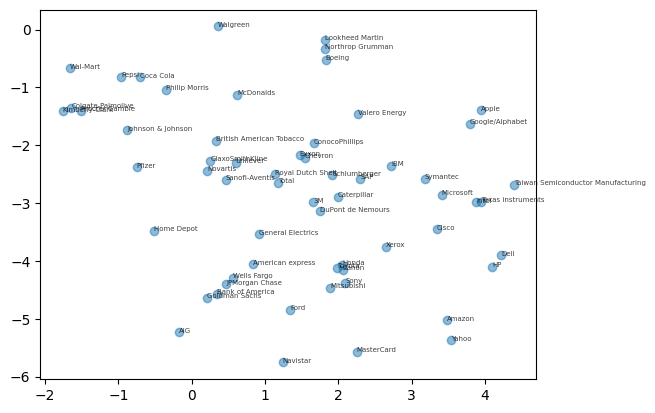

In [35]:
xs = transformed_normalized[:,0]
ys = transformed_normalized[:,1]

plt.scatter(xs , ys, alpha= 0.5)
for x,y, company in zip(xs, ys, companies):
    plt.annotate(company, (x,y), alpha= 0.75, fontsize = 5)

plt.show()